In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from scipy.special import boxcox1p
from scipy import stats
from matplotlib import cm

In [2]:
input_file = pd.read_csv('input.csv')
input_file = input_file.set_index('institute')
input_file = input_file[['degree centrality', 'structural hole (effective)','structural hole (local)']]
output_file = pd.read_csv('output.csv')
output_file = output_file[['institute', 'weighted publication']]
output_file = output_file.set_index('institute')

file = pd.concat([input_file, output_file], axis=1)
file = file.sort_values(by=['structural hole (effective)'])
file.columns = ['degree centrality', 'structural hole effective', 'structural hole local', 'weighted publication']

z = np.abs(stats.zscore(file['weighted publication']))
non_outlier = list(set(list(range(len(file)))) - set(list(np.where(z > 3)[0])))
file = file.iloc[non_outlier]

file

,degree centrality,structural hole effective,structural hole local,weighted publication
institute,,,,
"Politecnico di Torino, Torino, Italy",0.000575,1.000000,0.002500,0.800000
Tel-Aviv University,0.000575,1.000000,0.062500,0.333333
"H. Milton Stewart School of Industrial and Systems Engineering, Georgia Institute of Technology, USA",0.001151,1.000000,0.024198,0.250000
University of Nottingham Ningbo China,0.001151,1.000000,0.029388,0.600000
Kiel University,0.001151,1.000000,0.004444,1.200000
...,...,...,...,...
Norwegian University of Science and Technology,0.009206,13.800000,0.093038,3.016667
Université Paris-Dauphine,0.009206,14.000000,0.073452,4.266667
The Hong Kong Polytechnic University,0.010357,14.066667,0.091405,4.200000


Text(0, 0.5, 'Weighted Publication')

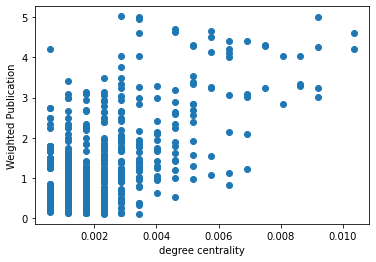

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(file['degree centrality'], file['weighted publication'], "o", label="Data")
plt.xlabel('degree centrality')
plt.ylabel('Weighted Publication')

Text(0, 0.5, 'Weighted Publication')

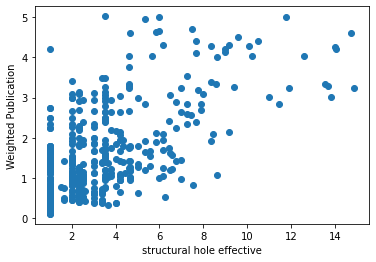

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(file['structural hole effective'], file['weighted publication'], "o", label="Data")
plt.xlabel('structural hole effective')
plt.ylabel('Weighted Publication')

Text(0, 0.5, 'Weighted Publication')

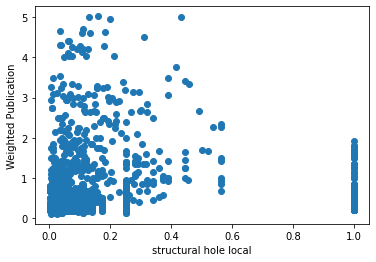

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(file['structural hole local'], file['weighted publication'], "o", label="Data")
plt.xlabel('structural hole local')
plt.ylabel('Weighted Publication')

Cobb-Douglas production function

$Y = AL^{\alpha}K^{\beta}$

$\log Y = \log A + \alpha \log L + \beta \log K$

Y is the output, which is the weighted publication. <br>
A is the total factor productivity. <br>
L is the first input, which is the structural hole (effective size). <br>
K is the second input, which is the structural hole (local constraints). <br>
$\alpha$ is the output elasticity of L, $\beta$ is the output elasticity of K. <br>

In [6]:
file['structural hole effective (log)'] = np.log(file['structural hole effective'])
file['structural hole local (log)'] = np.log(file['structural hole local'])
file['weighted publication (log)'] = np.log(file['weighted publication'])
file

,degree centrality,structural hole effective,structural hole local,weighted publication,structural hole effective (log),structural hole local (log),weighted publication (log)
institute,,,,,,,
"Politecnico di Torino, Torino, Italy",0.000575,1.000000,0.002500,0.800000,0.000000,-5.991465,-0.223144
Tel-Aviv University,0.000575,1.000000,0.062500,0.333333,0.000000,-2.772589,-1.098612
"H. Milton Stewart School of Industrial and Systems Engineering, Georgia Institute of Technology, USA",0.001151,1.000000,0.024198,0.250000,0.000000,-3.721505,-1.386294
University of Nottingham Ningbo China,0.001151,1.000000,0.029388,0.600000,0.000000,-3.527177,-0.510826
Kiel University,0.001151,1.000000,0.004444,1.200000,0.000000,-5.416100,0.182322
...,...,...,...,...,...,...,...
Norwegian University of Science and Technology,0.009206,13.800000,0.093038,3.016667,2.624669,-2.374744,1.104152
Université Paris-Dauphine,0.009206,14.000000,0.073452,4.266667,2.639057,-2.611118,1.450833
The Hong Kong Polytechnic University,0.010357,14.066667,0.091405,4.200000,2.643808,-2.392453,1.435085


In [7]:
X = file[['structural hole effective (log)', 'structural hole local (log)']]
y = file['weighted publication (log)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

C:\Users\champ\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     weighted publication (log)   R-squared:                       0.499
Model:                                    OLS   Adj. R-squared:                  0.499
Method:                         Least Squares   F-statistic:                     752.6
Date:                        Mon, 20 Jun 2022   Prob (F-statistic):          1.76e-227
Time:                                17:06:52   Log-Likelihood:                -1345.8
No. Observations:                        1513   AIC:                             2698.
Df Residuals:                            1510   BIC:                             2714.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8388      0.027    -30.550      0.000      -0.893      -0.785
structural hole effective (log)     0.9904      0.026     38.444      0.000       0.940       1.041
structural hole local (log)         0.0590      0.010      5.972      0.000       0.040       0.078
==============================================================================
Omnibus:                       58.411   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.585
Skew:                           0.506   Prob(JB):                     9.45e-15
Kurtosis:                       3.038   Cond. No.                         5.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y_pred_log = model.predict(X)
y_pred = np.exp(y_pred_log)
# print(max(file['weighted publication'] - y_pred))
y_pred += max(file['weighted publication'] - y_pred)
file['weighted publication (prediction)'] = y_pred
file

,degree centrality,structural hole effective,structural hole local,weighted publication,structural hole effective (log),structural hole local (log),weighted publication (log),weighted publication (prediction)
institute,,,,,,,,
"Politecnico di Torino, Torino, Italy",0.000575,1.000000,0.002500,0.800000,0.000000,-5.991465,-0.223144,4.123822
Tel-Aviv University,0.000575,1.000000,0.062500,0.333333,0.000000,-2.772589,-1.098612,4.187323
"H. Milton Stewart School of Industrial and Systems Engineering, Georgia Institute of Technology, USA",0.001151,1.000000,0.024198,0.250000,0.000000,-3.721505,-1.386294,4.167334
University of Nottingham Ningbo China,0.001151,1.000000,0.029388,0.600000,0.000000,-3.527177,-0.510826,4.171337
Kiel University,0.001151,1.000000,0.004444,1.200000,0.000000,-5.416100,0.182322,4.134305
...,...,...,...,...,...,...,...,...
Norwegian University of Science and Technology,0.009206,13.800000,0.093038,3.016667,2.624669,-2.374744,1.104152,8.876446
Université Paris-Dauphine,0.009206,14.000000,0.073452,4.266667,2.639057,-2.611118,1.450833,8.877961
The Hong Kong Polytechnic University,0.010357,14.066667,0.091405,4.200000,2.643808,-2.392453,1.435085,8.967820


Text(0, 0.5, 'weighted publication')

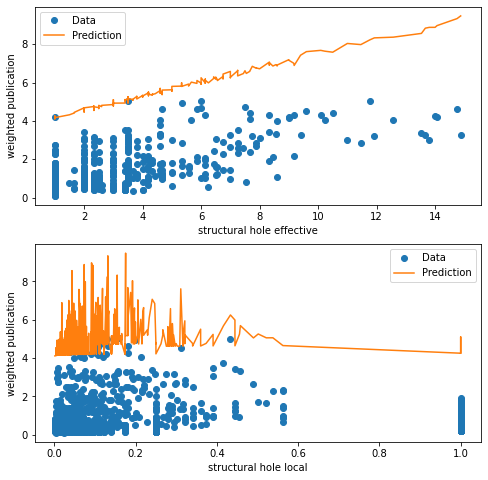

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,figsize=(8,8))

file = file.sort_values(by=['structural hole effective'])
ax[0].plot(file['structural hole effective'], file['weighted publication'], "o", label="Data")
ax[0].plot(file['structural hole effective'], file['weighted publication (prediction)'], label="Prediction")
ax[0].legend(loc="best")
ax[0].set_xlabel("structural hole effective")
ax[0].set_ylabel("weighted publication")

file = file.sort_values(by=['structural hole local'])
ax[1].plot(file['structural hole local'], file['weighted publication'], "o", label="Data")
ax[1].plot(file['structural hole local'], file['weighted publication (prediction)'], label="Prediction")
ax[1].legend(loc="best")
ax[1].set_xlabel("structural hole local")
ax[1].set_ylabel("weighted publication")

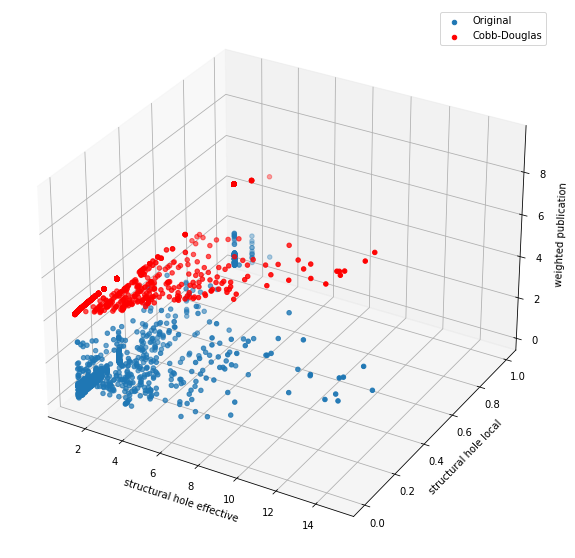

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(file['structural hole effective'],file['structural hole local'],file['weighted publication'])
ax.scatter(file['structural hole effective'],file['structural hole local'],file['weighted publication (prediction)'], c="red")

ax.set_xlabel("structural hole effective")
ax.set_ylabel("structural hole local")
ax.set_zlabel("weighted publication")
ax.legend(['Original', 'Cobb-Douglas'])
plt.show()

In [11]:
def f(x, y):
    log_x = np.log(x)
    log_y = np.log(y)
    result = model.params[0] + model.params[1] * log_x + model.params[2] * log_y
    result = np.exp(result)
    result += 3.82032436604145
    return result

X, Y = np.meshgrid(file['structural hole effective'],file['structural hole local'])
Z = f(X,Y)
Z

array([[4.11200377, 4.11200377, 4.11200377, ..., 4.11200377, 4.11200377,
        4.11200377],
       [4.11325863, 4.11325863, 4.11325863, ..., 4.11325863, 4.11325863,
        4.11325863],
       [4.11325863, 4.11325863, 4.11325863, ..., 4.11325863, 4.11325863,
        4.11325863],
       ...,
       [4.25257337, 4.25257337, 4.25257337, ..., 4.25257337, 4.25257337,
        4.25257337],
       [4.25257337, 4.25257337, 4.25257337, ..., 4.25257337, 4.25257337,
        4.25257337],
       [4.25257337, 4.25257337, 4.25257337, ..., 4.25257337, 4.25257337,
        4.25257337]])

Text(0.5, 0, 'weighted publication')

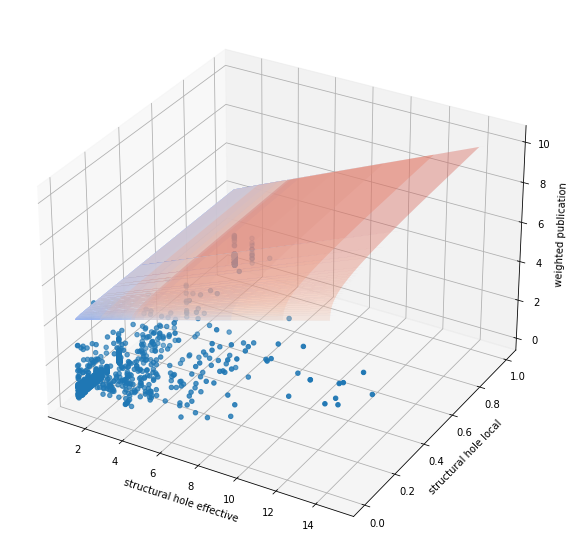

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, alpha=0.2)
ax.scatter(file['structural hole effective'],file['structural hole local'],file['weighted publication'])
ax.set_xlabel('structural hole effective')
ax.set_ylabel('structural hole local')
ax.set_zlabel('weighted publication')

In [13]:
file['efficiency'] = file['weighted publication'] / file['weighted publication (prediction)']
file

,degree centrality,structural hole effective,structural hole local,weighted publication,structural hole effective (log),structural hole local (log),weighted publication (log),weighted publication (prediction),efficiency
institute,,,,,,,,,
"Engineering Cluster, Singapore Institute of Technology, 10 Dover Drive, Singapore 138683, Singapore",0.000575,1.0,0.001276,0.200000,0.0,-6.664409,-1.609438,4.112004,0.048638
"Alliance Manchester Business School, Humanitarian and Conflict Response Institute, Manchester M15 6PB, United Kingdom",0.000575,1.0,0.001372,0.333333,0.0,-6.591674,-1.098612,4.113259,0.081039
University of Hyogo,0.000575,1.0,0.001372,0.333333,0.0,-6.591674,-1.098612,4.113259,0.081039
"London School of Economics, Houghton Street, London WC2A 2AE, UK",0.000575,1.0,0.001372,0.333333,0.0,-6.591674,-1.098612,4.113259,0.081039
"Department of Mathematical Modelling and Optimal Design, Institute for Mechanical Engineering Problems of the National Academy of Sciences of Ukraine, Pozharsky Str., 2/10, Kharkov 61046, Ukraine",0.000575,1.0,0.001372,0.800000,0.0,-6.591674,-0.223144,4.113259,0.194493
...,...,...,...,...,...,...,...,...,...
"School of Management and Economics, Beijing Institute of Technology, Beijing, China",0.001151,1.0,1.000000,1.600000,0.0,0.000000,0.470004,4.252573,0.376243
"Management Department, Frankfurt School of Finance & Management, Adickesallee 32-34, 60322 Frankfurt, Germany",0.000575,1.0,1.000000,0.666667,0.0,0.000000,-0.405465,4.252573,0.156768
University of Texas at Tyler,0.000575,1.0,1.000000,0.250000,0.0,0.000000,-1.386294,4.252573,0.058788


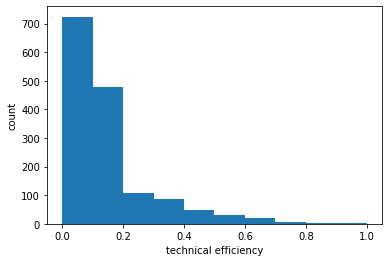

In [14]:
plt.hist(file['efficiency'], bins = 10, range = (0,1))
plt.xlabel('technical efficiency')
plt.ylabel('count')
plt.show()